# Testing boosting methods

This jupyter notebook is the last part of a series of notebooks that contain code to generate the results of this [REFERENCE] paper. Here we focus on boosting probabilities.

For that, there are two options:
1. Modified an adjancency matrix: play with the random epsilon value in *is_isomorphic_p()* (or *is_isomorphic_l()*) function.
2. Hacking the adjacency matrix: multiplying a column of the matrix corresponding to the node with lowest connectivity by a value $w$.

As usual, we will start with some imports and the auxiliary functions.

In [2]:
import numpy as np
import networkx as nx

import quandelibc as qc
import perceval as pcvl

Import of the file with the basic and auxiliary functions.

In [2]:
import functions

Here we define again *perm_estimation()* function because there is a detail to consider when boosting by hacking the adjacency matrix and here it prints a warning.

In [3]:
def perm_estimation(G, Ns, Ns_min=0):
    if Ns_min == 0:
        Ns_min = Ns

    Sampling_Backend = pcvl.BackendFactory().get_backend("CliffordClifford2017")
    if type(G) == type(nx.Graph()):  # if we input the graph directly instead of the matrix, NetworkX will output a slightly different matrix leading to wrong results!
        m = G.number_of_nodes()
        print("Inputing a graph from a modified adjacency matrix might lead to wrong results! We advice to use the adjacency matrix directly.")
    else:
        m = len(G)
    inputState = functions.input_state(m)

    U, c = functions.to_unitary(G)
    U = pcvl.Matrix(U)
    simulator = Sampling_Backend(U)

    samples = []
    i = 0
    while len(samples) < Ns_min:
        for _ in range(Ns):
            samples.append(list(simulator.sample(pcvl.BasicState(inputState))))
        samples = functions.post_select(samples)
        i = i+1

    print("Total number of samples:", Ns*i)
    print("Accepted:", len(samples))
    perm = (c**m)*np.sqrt(len(samples)/(Ns*i))
    return perm

## Hacking the adjacency matrix

Here you can test the effect of hacking the adjacency matrix. Be carefull how you handle this, NetworkX might not handle very well this type of modified adjacency matrices.

Here we test for the graph on the following cell:

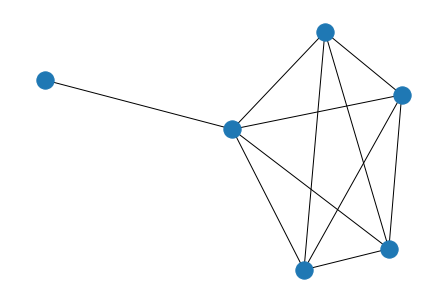

In [4]:
A = np.array([[0, 1, 1, 1, 1, 0],
              [1, 0, 1, 1, 1, 1],
              [1, 1, 0, 1, 1, 0],
              [1, 1, 1, 0, 1, 0],
              [1, 1, 1, 1, 0, 0],
              [0, 1, 0, 0, 0, 0]])
nx.draw(nx.from_numpy_array(A))

In [43]:
%%time
B = np.copy(A)
B[5] = B[5]*1
perm_estimation(B, 100)/1

6
Total number of samples: 25387600
Accepted: 100
CPU times: user 1h 44min 9s, sys: 21.3 s, total: 1h 44min 30s
Wall time: 1h 44min 43s


8.776136144625532

In [42]:
%%time
B = np.copy(A)
B[5] = B[5]*2
a = perm_estimation(B, 100)/2
print(a)

6
Total number of samples: 8482000
Accepted: 100
8.693624296527505
CPU times: user 34min 53s, sys: 7.71 s, total: 35min
Wall time: 35min 4s


In [45]:
%%time
B = np.copy(A)
B[5] = B[5]*3
a = perm_estimation(B, 100)/3
print(a)

6
Total number of samples: 7297500
Accepted: 100
8.61335143525163
CPU times: user 30min 1s, sys: 7.68 s, total: 30min 9s
Wall time: 30min 12s


In [46]:
%%time
B = np.copy(A)
B[5] = B[5]*4
a = perm_estimation(B, 100)/4
print(a)

6
Total number of samples: 12133600
Accepted: 100
9.303295439393768
CPU times: user 50min 46s, sys: 12.1 s, total: 50min 58s
Wall time: 51min 17s


In [48]:
%%time
B = np.copy(A)
B[5] = B[5]*5
a = perm_estimation(B, 100)/5
print(a)

6
Total number of samples: 38324100
Accepted: 100
9.63701377801791
CPU times: user 2h 37min 38s, sys: 30 s, total: 2h 38min 8s
Wall time: 2h 38min 27s


The results from these last cells reproduce the results for the boosting table in the paper. 

Here we focused on hacking the adjacency matrix as it is the main point for boosting and leave the second method of boosting (varying epsilon values) to the reader to test. This concludes this series of notebooks.